In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [2]:
ls


 Volume in drive C has no label.
 Volume Serial Number is B841-0E2D

 Directory of C:\Users\SANVI\Documents\ExelR Assignment\Random forest

30-04-2022  03.10 PM    <DIR>          .
30-04-2022  03.10 PM    <DIR>          ..
30-04-2022  03.08 PM    <DIR>          .ipynb_checkpoints
20-04-2022  09.47 PM            17,023 Company_Data.csv
20-04-2022  09.47 PM            21,837 Fraud_check.csv
20-04-2022  09.48 PM             1,378 problem statement(company data).txt
20-04-2022  09.48 PM               133 Problem_statement(Fraudcheck).txt
30-04-2022  03.07 PM            43,517 rf_companydata_sales.ipynb
30-04-2022  03.10 PM               576 RF_fraudcheck.ipynb
30-04-2022  01.54 PM             1,262 small_tree.dot
30-04-2022  01.54 PM            26,686 tree.dot
               8 File(s)        112,412 bytes
               3 Dir(s)  101,789,368,320 bytes free


In [17]:
data = pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [20]:
data['Taxable.Income'].max()


99619

In [21]:
data = pd.get_dummies(data, columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [22]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [24]:
data["TaxInc"] = pd.cut(data["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [25]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


(array([476.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 124.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

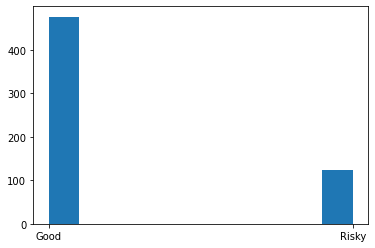

In [26]:
plt.hist(data['TaxInc'])

In [35]:
X=data.iloc[:,1:6]
y=data['TaxInc']

In [37]:
X

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
0,50047,10,0,0,1
1,134075,18,1,0,0
2,160205,30,0,1,0
3,193264,15,1,0,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,0
596,55369,2,1,0,0
597,154058,0,0,0,0
598,180083,17,1,1,0


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.33, random_state= 5)

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
model=RandomForestClassifier(n_estimators=100, max_features=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [41]:
y_pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',


In [42]:
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.7676767676767676

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.81      0.93      0.87       160
       Risky       0.21      0.08      0.12        38

    accuracy                           0.77       198
   macro avg       0.51      0.51      0.49       198
weighted avg       0.70      0.77      0.72       198



In [44]:
kfold =KFold(n_splits=10, shuffle =True, random_state =None)
model1 =RandomForestClassifier(n_estimators=100,max_features =3)
results=cross_val_score(model1,X,y, cv =kfold)

In [45]:
print(np.mean(results))

0.7333333333333333


In [46]:
from sklearn.ensemble import BaggingClassifier

In [47]:
kfold1 =KFold(n_splits =10,shuffle =True,random_state=10)
model2=RandomForestClassifier(n_estimators =100,criterion ='entropy',max_features =3)
model3 =BaggingClassifier(base_estimator =model2,n_estimators =100,random_state =10)
results1 =cross_val_score(model3,X,y,cv=kfold1)

In [48]:
print(np.mean(results1))

0.7649999999999999
